<font size="6"> **Model Building** </font>

Apply advanced Random Forest like models to overcome the issues formerly detected. Decide which methodology is the best performant and fit the champion model

In [19]:
%%capture
%run 04_alphaml_feat_eng.ipynb

In [20]:
MODEL_VERSION = 'v02'
print('Model version: ', MODEL_VERSION)

Model version:  v02


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import ParameterGrid

import pickle

In [22]:
from mle_quant_utils import mle_utils

In [23]:
splits = cfg['models']['alpha_ml']['splits']
split_col = cfg['models']['alpha_ml']['split_col']

In [24]:
OUTPATH =  "../data/" + cfg['output']['main'] + "/" + cfg['output']['alpha_factors_ml']['folder'] + "/" + MODEL_VERSION +"/"
OUTFILE1 = cfg['output']['alpha_factors_ml']['features']
OUTFILE2 = cfg['output']['alpha_factors_ml']['targets']
OUTFILE3 = cfg['output']['alpha_factors_ml']['model']

In [25]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)
sns.set_context("talk")

# Load Models

In [45]:
model_backlog_path = OUTPATH + "models_backlog" + "/"
model_backlog_ls = os.listdir(model_backlog_path)
print(model_backlog_path )
model_backlog_ls

../data/output/alpha_factors_ml/v02/models_backlog/


['01_raw_lin_reg_0',
 '02_raw_ridge_0',
 '02_raw_ridge_1',
 '02_raw_ridge_2',
 '02_raw_ridge_3',
 '02_raw_ridge_4',
 '02_raw_ridge_5',
 '02_raw_ridge_6',
 '02_raw_ridge_7',
 '03_raw_rf_0',
 '03_raw_rf_1',
 '03_raw_rf_10',
 '03_raw_rf_11',
 '03_raw_rf_2',
 '03_raw_rf_3',
 '03_raw_rf_4',
 '03_raw_rf_5',
 '03_raw_rf_6',
 '03_raw_rf_7',
 '03_raw_rf_8',
 '03_raw_rf_9',
 'model_results.csv']

In [44]:
model_backlog_path + model

'../data/output/alpha_factors_ml/v02/models_backlog/01_raw_lin_0'

In [140]:
lin_raw_models, rid_raw_models, rf_raw_models = [], [], []
lin_raw_models_names = [x for x in model_backlog_ls if x.startswith("01_raw_lin_")]
rid_raw_models_names = [x for x in model_backlog_ls if x.startswith("02_raw_ridge_")]
rf_raw_models_names = [x for x in model_backlog_ls if x.startswith("03_raw_rf_")]

for model in lin_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        lin_raw_models.append(pickle.load(file))
for model in rid_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        rid_raw_models.append(pickle.load(file))
for model in rf_raw_models_names:
    with open(model_backlog_path + model, 'rb') as file:
        rf_raw_models.append(pickle.load(file))
with open(OUTPATH + OUTFILE3, 'rb') as file:
    champ_mod_refit = pickle.load(file)

In [141]:
results_sum_df = pd.read_csv(model_backlog_path + 'model_results.csv',index_col=['model', 'index'])
results_sum_df

alpha  n_estimators  min_samples_leaf  max_features  \
model          index                                                            
01_raw_lin_reg 0            NaN           NaN               NaN           NaN   
02_raw_ridge   0          0.001           NaN               NaN           NaN   
               1          0.010           NaN               NaN           NaN   
               2          0.100           NaN               NaN           NaN   
               3          1.000           NaN               NaN           NaN   
               4         10.000           NaN               NaN           NaN   
               5        100.000           NaN               NaN           NaN   
               6       1000.000           NaN               NaN           NaN   
               7      10000.000           NaN               NaN           NaN   
03_raw_rf      0            NaN         100.0             500.0          0.50   
               1            NaN         100.0            2500.0          0.50   
               2            NaN         100.0            5000.0          0.50   
               3            NaN         100.0           10000.0          0.50   
               4            NaN         100.0             500.0          0.75   
               5            NaN         100.0            2500.0          0.75   
               6            NaN         100.0            5000.0          0.75   
               7            NaN         100.0           10000.0          0.75   
               8            NaN         100.0             500.0          1.00   
               9            NaN         100.0            2500.0          1.00   
               10           NaN         100.0            5000.0          1.00   
               11           NaN         100.0           10000.0          1.00   

                      train_acc  train_acc_target<0  train_acc_target>0  \
model          index                                                      
01_raw_lin_reg 0       0.578039            0.331339            0.767607   
02_raw_ridge   0       0.578173            0.331848            0.767452   
               1       0.578325            0.333248            0.766645   
               2       0.578938            0.337449            0.764501   
               3       0.579035            0.341088            0.761876   
               4       0.579362            0.332050            0.769400   
               5       0.579367            0.244927            0.836355   
               6       0.574398            0.078202            0.955681   
               7       0.567912            0.025873            0.984423   
03_raw_rf      0       0.715302            0.602255            0.802168   
               1       0.679427            0.525528            0.797685   
               2       0.661469            0.511780            0.776492   
               3       0.635006            0.395517            0.819033   
               4       0.715721            0.606562            0.799601   
               5       0.678095            0.532296            0.790129   
               6       0.661473            0.502318            0.783771   
               7       0.639035            0.463249            0.774112   
               8       0.715154            0.604112            0.800481   
               9       0.668724            0.508216            0.792061   
               10      0.647691            0.489769            0.769041   
               11      0.624193            0.496335            0.722440   

                      train_pmean  train_score  oob_score  valid_acc  \
model          index                                                   
01_raw_lin_reg 0         0.003705     0.000803        NaN   0.550552   
02_raw_ridge   0         0.003704     0.000803        NaN   0.550414   
               1         0.003704     0.000803        NaN   0.549602   
               2         0.003704     0.000803        NaN   0.548693   
    

# Data Preparation

In [47]:
all_assets = all_factors.index.levels[1].values.tolist()
all_pricing = quant_helper.get_pricing(
    data_portal,
    trading_calendar,
    all_assets,
    factor_start_date,
    universe_end_date)

C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:54: FutureWarning: offset is deprecated. Use freq instead
  end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
C:\Users\manua\Documents\repos\dslab_ai4trading\alpha_factors\mle_quant_utils\quant_helper.py:55: FutureWarning: offset is deprecated. Use freq instead
  start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')


# Data Partitioning

In [48]:
print(return_d_raw)

return_5d_raw


In [49]:
targets_df[target_col] = targets_df.groupby(level=1)[return_d_raw].shift(-TAU).fillna(0.0)

In [50]:
X_train, X_valid, X_test, y_train, y_valid, y_test = mle_utils.train_valid_test_split(all_factors, targets_df[target_col],
                                                                                      splits['train'], splits['valid'], splits['test'])

In [51]:
(y_train>0).value_counts()

True     122680
False     94269
Name: target, dtype: int64

In [52]:
(y_valid>0).value_counts()

True     40269
False    32349
Name: target, dtype: int64

# Model Building

In [ ]:
all_models = lin_raw_models + rid_raw_models + rf_raw_models
all_models_names = lin_raw_models_names + rid_raw_models_names  + rf_raw_models_names
train_ml_alpha_lst, train_factor_returns_lst, train_sharpe_ratio_lst, train_cum_returns_lst, train_factor_fra_lst = [], [], [], [], []
valid_ml_alpha_lst, valid_factor_returns_lst, valid_sharpe_ratio_lst, valid_cum_returns_lst, valid_factor_fra_lst = [], [], [], [], []
test_ml_alpha_lst, test_factor_returns_lst, test_sharpe_ratio_lst, test_cum_returns_lst, test_factor_fra_lst = [], [], [], [], []

for i, (name, model) in enumerate(zip(all_models_names, all_models)):
    if i==0:
        factor_names = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']
    else:
        factor_names = []
        
    train_ml_alpha, train_factor_returns, train_sharpe_ratio, train_factor_cum_rets, train_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_train, model, factor_names, all_pricing,
                                      quantiles=None,bins=5, periods = 5, kind='reg')
    train_ml_alpha_lst.append(train_ml_alpha)
    train_factor_returns_lst.append(train_factor_returns)
    train_sharpe_ratio_lst.append(train_sharpe_ratio)
    train_cum_returns_lst.append(train_factor_cum_rets)
    train_factor_fra_lst.append(train_factor_fra)
    
    valid_ml_alpha, valid_factor_returns, valid_sharpe_ratio, valid_factor_cum_rets, valid_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_valid, model, factor_names, all_pricing,
                                      quantiles=None, bins=5, periods = 5, kind='reg')
    valid_ml_alpha_lst.append(valid_ml_alpha)
    valid_factor_returns_lst.append(valid_factor_returns)
    valid_sharpe_ratio_lst.append(valid_sharpe_ratio)
    valid_cum_returns_lst.append(valid_factor_cum_rets)
    valid_factor_fra_lst.append(valid_factor_fra)
    
    test_ml_alpha, test_factor_returns, test_sharpe_ratio, test_factor_cum_rets, test_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_test, model, factor_names, all_pricing,
                                      quantiles=None, bins=5, periods = 5, kind='reg')
    test_ml_alpha_lst.append(      test_ml_alpha)
    test_factor_returns_lst.append(test_factor_returns)
    test_sharpe_ratio_lst.append(  test_sharpe_ratio)
    test_cum_returns_lst.append(   test_factor_cum_rets)
    test_factor_fra_lst.append(        test_factor_fra)
    
    

In [144]:
factor_names = ['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed']

test_ml_alpha, test_factor_returns, test_sharpe_ratio, test_factor_cum_rets, test_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_test, champ_mod_refit, factor_names, all_pricing,
                                  quantiles=None, bins=5, periods = 5, kind='reg')


Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



In [148]:
OUTFILE1 = 'factor_returns.csv'
test_factor_returns.to_csv(OUTPATH + OUTFILE1)

In [145]:
test_sharpe_ratio

Mean_Reversion_Sector_Neutral_Smoothed    1.213817
Overnight_Sentiment_Smoothed             -1.036909
ML_FACTOR                                 1.457343
Momentum_1YR_Smoothed                     5.396779
dtype: float64

In [120]:
len(all_models_names), len(train_ml_alpha_lst), len(train_sharpe_ratio_lst), len(train_cum_returns_lst)

(21, 21, 21, 21)

In [121]:
train_ml_alpha_df = pd.DataFrame(index = train_ml_alpha.index)
train_sharpe_df = pd.DataFrame(index = train_sharpe_ratio.index)
train_cumrets_df = pd.DataFrame(index = train_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, train_ml_alpha_lst, train_sharpe_ratio_lst, train_cum_returns_lst):
    train_ml_alpha_df = train_ml_alpha_df.join(s_alpha.to_frame(name))
    train_sharpe_df = train_sharpe_df.join(s_sharpe.to_frame(name))
    train_cumrets_df = train_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([train_ml_alpha_df.head(2), train_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2013-01-03 00:00:00+00:00 Equity(0 [A])               0.005950   
                          Equity(1 [AAL])             0.007854   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])          0.017009   
                          Equity(490 [ZTS])           0.017850   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.005895        0.005616   
                          Equity(1 [AAL])           0.007800        0.007522   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.017038        0.017179   
                          Equity(490 [ZTS])         0.017878        0.018016   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.005291        0.005251   
                          Equity(1 [AAL])           0.007197        0.007158   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.017314        0.017228   
                          Equity(490 [ZTS])         0.018149        0.018062   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.004999        0.003656   
                          Equity(1 [AAL])           0.006906        0.005557   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.016834        0.013576   
                          Equity(490 [ZTS])         0.017669        0.014415   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2013-01-03 00:00:00+00:00 Equity(0 [A])             0.001797        0.002137   
                          Equity(1 [AAL])           0.003667        0.003934   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])        0.007462        0.004961   
                          Equity(490 [ZTS])         0.008318        0.005783   

                                              03_raw_rf_0     ...       \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005561     ...        
                          Equity(1 [AAL])        0.006492     ...        
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.032707     ...        
                          Equity(490 [ZTS])      0.032822     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2013-01-03 00:00:00+00:00 Equity(0 [A])           0.013710      0.010372   
                          Equity(1 [AAL])         0.013710      0.010372   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])      0.015698      0.018599   
                          Equity(490 [ZTS])       0.016039      0.018599   

                                              03_raw_rf_2  03_raw_rf_3  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.012966     0.009367   
                          Equity(1 [AAL])        0.013089     0.009483   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.016771     0.015298   
                          Equity(490 [ZTS])      0.017054     0.015298   

                                              03_raw_rf_4  03_raw_rf_5  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005680     0.008803   
                          Equity(1 [AAL])        0.005887     0.008909   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.035421     0.029733   
                          Equity(490 [ZTS])      0.035928     0.029878   

                                              03_raw_rf_6  03_raw_rf_7  \
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.013159     0.009390   
                          Equity(1 [AAL])        0.013201     0.009390   
2014-10-22 00:00:00+00:00 Equity(489 [ZION])     0.016213     0.016978   
                          Equity(490 [ZTS])      0.016343     0.016978   

                                              03_raw_rf_8  03_raw_rf_9  
2013-01-03 00:00:00+00:00 Equity(0 [A])          0.005292     0.009124  
                          Equity(1 [AAL])        0.005448     0.009124  
2014-10-22 00:00:00+00:00 E

In [122]:
valid_ml_alpha_df = pd.DataFrame(index = valid_ml_alpha.index)
valid_sharpe_df = pd.DataFrame(index =   valid_sharpe_ratio.index)
valid_cumrets_df = pd.DataFrame(index =  valid_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, valid_ml_alpha_lst, valid_sharpe_ratio_lst, valid_cum_returns_lst):
    valid_ml_alpha_df = valid_ml_alpha_df.join(s_alpha.to_frame(name))
    valid_sharpe_df =   valid_sharpe_df.join(s_sharpe.to_frame(name))
    valid_cumrets_df =  valid_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([valid_ml_alpha_df.head(2), valid_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2014-10-22 00:00:00+00:00 Equity(0 [A])               0.018009   
                          Equity(1 [AAL])             0.017876   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])          0.002413   
                          Equity(490 [ZTS])           0.002732   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.018037        0.018178   
                          Equity(1 [AAL])           0.017905        0.018046   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002408        0.002388   
                          Equity(490 [ZTS])         0.002727        0.002706   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.018313        0.018227   
                          Equity(1 [AAL])           0.018182        0.018096   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002419        0.002540   
                          Equity(490 [ZTS])         0.002735        0.002856   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.017833        0.014572   
                          Equity(1 [AAL])           0.017702        0.014441   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.002549        0.002747   
                          Equity(490 [ZTS])         0.002867        0.003066   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2014-10-22 00:00:00+00:00 Equity(0 [A])             0.008422        0.005675   
                          Equity(1 [AAL])           0.008311        0.005738   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])        0.003330        0.003326   
                          Equity(490 [ZTS])         0.003649        0.003590   

                                              03_raw_rf_0     ...       \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.031909     ...        
                          Equity(1 [AAL])        0.036723     ...        
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.007607     ...        
                          Equity(490 [ZTS])     -0.007010     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2014-10-22 00:00:00+00:00 Equity(0 [A])           0.015393      0.018599   
                          Equity(1 [AAL])         0.022964      0.018599   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])     -0.004867     -0.002936   
                          Equity(490 [ZTS])      -0.004867     -0.002936   

                                              03_raw_rf_2  03_raw_rf_3  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.016460     0.015298   
                          Equity(1 [AAL])        0.019977     0.015058   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.004242    -0.002040   
                          Equity(490 [ZTS])     -0.004080    -0.002040   

                                              03_raw_rf_4  03_raw_rf_5  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.034851     0.029733   
                          Equity(1 [AAL])        0.038811     0.029779   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.004006    -0.006767   
                          Equity(490 [ZTS])     -0.004161    -0.006854   

                                              03_raw_rf_6  03_raw_rf_7  \
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.015800     0.016978   
                          Equity(1 [AAL])        0.021516     0.016978   
2015-05-28 00:00:00+00:00 Equity(489 [ZION])    -0.003240    -0.002803   
                          Equity(490 [ZTS])     -0.003297    -0.002803   

                                              03_raw_rf_8  03_raw_rf_9  
2014-10-22 00:00:00+00:00 Equity(0 [A])          0.036036     0.031251  
                          Equity(1 [AAL])        0.041134     0.031251  
2015-05-28 00:00:00+00:00 E

In [129]:
test_ml_alpha_df = pd.DataFrame(index = test_ml_alpha.index)
test_sharpe_df = pd.DataFrame(index =   test_sharpe_ratio.index)
test_cumrets_df = pd.DataFrame(index =  test_factor_cum_rets.index)
for (name, s_alpha, s_sharpe, s_cumrets) in zip(all_models_names, test_ml_alpha_lst, test_sharpe_ratio_lst, test_cum_returns_lst):
    test_ml_alpha_df = test_ml_alpha_df.join(s_alpha.to_frame(name))
    test_sharpe_df =   test_sharpe_df.join(s_sharpe.to_frame(name))
    test_cumrets_df =  test_cumrets_df.join(s_cumrets.rename(columns={'ML_FACTOR': name}))
    
pd.concat([test_ml_alpha_df.head(2), test_ml_alpha_df.tail(2)])

01_raw_lin_reg_0  \
2015-05-28 00:00:00+00:00 Equity(0 [A])               0.004324   
                          Equity(1 [AAL])             0.005036   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])          0.029043   
                          Equity(490 [ZTS])           0.029051   

                                              02_raw_ridge_0  02_raw_ridge_1  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004319        0.004299   
                          Equity(1 [AAL])           0.005030        0.005010   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.028973        0.028620   
                          Equity(490 [ZTS])         0.028981        0.028630   

                                              02_raw_ridge_2  02_raw_ridge_3  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004329        0.004450   
                          Equity(1 [AAL])           0.005041        0.005162   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.028144        0.027845   
                          Equity(490 [ZTS])         0.028155        0.027856   

                                              02_raw_ridge_4  02_raw_ridge_5  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.004460        0.004656   
                          Equity(1 [AAL])           0.005171        0.005365   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.026532        0.020454   
                          Equity(490 [ZTS])         0.026544        0.020458   

                                              02_raw_ridge_6  02_raw_ridge_7  \
2015-05-28 00:00:00+00:00 Equity(0 [A])             0.005220        0.005033   
                          Equity(1 [AAL])           0.005932        0.005835   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])        0.011429        0.008133   
                          Equity(490 [ZTS])         0.011350        0.007620   

                                              03_raw_rf_0     ...       \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.006976     ...        
                          Equity(1 [AAL])       -0.007157     ...        
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.017337     ...        
                          Equity(490 [ZTS])      0.014781     ...        

                                              03_raw_rf_10  03_raw_rf_11  \
2015-05-28 00:00:00+00:00 Equity(0 [A])          -0.004867     -0.002936   
                          Equity(1 [AAL])        -0.004867     -0.002936   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])      0.020282      0.018599   
                          Equity(490 [ZTS])       0.013556      0.018599   

                                              03_raw_rf_2  03_raw_rf_3  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.004214    -0.002028   
                          Equity(1 [AAL])       -0.003530    -0.001592   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.017821     0.017026   
                          Equity(490 [ZTS])      0.013931     0.017026   

                                              03_raw_rf_4  03_raw_rf_5  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.004120    -0.006744   
                          Equity(1 [AAL])       -0.003569    -0.006744   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.020808     0.015720   
                          Equity(490 [ZTS])      0.013726     0.013516   

                                              03_raw_rf_6  03_raw_rf_7  \
2015-05-28 00:00:00+00:00 Equity(0 [A])         -0.003297    -0.002803   
                          Equity(1 [AAL])       -0.003240    -0.002803   
2015-12-28 00:00:00+00:00 Equity(489 [ZION])     0.020403     0.018307   
                          Equity(490 [ZTS])      0.013947     0.018307   

                                              03_raw_rf_8  03_raw_rf_9  
2015-05-28 00:00:00+00:00 Equity(0 [A])          0.000675    -0.009452  
                          Equity(1 [AAL])        0.002301    -0.009452  
2015-12-28 00:00:00+00:00 E

In [130]:
train_sharpe_df = train_sharpe_df.T.copy()
train_sharpe_df.columns =  ['train_sharpe']

valid_sharpe_df = valid_sharpe_df.T.copy()
valid_sharpe_df.columns =  ['valid_sharpe']

test_sharpe_df = test_sharpe_df.T.copy()
test_sharpe_df.columns =  ['test_sharpe']

train_sharpe_df.join(valid_sharpe_df).join(test_sharpe_df)

,train_sharpe,valid_sharpe,test_sharpe
01_raw_lin_reg_0,5.923625,5.345635,-1.336468
02_raw_ridge_0,5.927234,5.344175,-1.332070
02_raw_ridge_1,5.943517,5.332940,-1.316979
02_raw_ridge_2,5.965155,5.308275,-1.294753
02_raw_ridge_3,5.971705,5.296338,-1.289257
02_raw_ridge_4,5.972761,5.292578,-1.291453
02_raw_ridge_5,5.965087,5.276458,-1.311635
02_raw_ridge_6,5.856154,5.212193,-1.389471
02_raw_ridge_7,5.240394,4.741093,-1.829649
03_raw_rf_0,24.465762,2.551885,-2.328138


In [131]:
test_sharpe_ratio_lst[0]

Mean_Reversion_Sector_Neutral_Smoothed    1.213817
Overnight_Sentiment_Smoothed             -1.036909
ML_FACTOR                                -1.336468
Momentum_1YR_Smoothed                     5.396779
dtype: float64

In [133]:
rawrf_reg_parameters = ParameterGrid({
    'min_samples_leaf': [5000],
    'n_estimators': [100],
    'criterion': ['mse'],
    'max_features': [0.75],
    'oob_score': [True],
    'n_jobs': [-1],
    'random_state': [123]})

In [134]:
rf_reg_raw = RandomForestRegressor()
rf_raw_models, rf_raw_results = mle_utils.rf_train_val_grid_search(rf_reg_raw, rawrf_reg_parameters,
                                                                   pd.concat([X_train, X_valid], axis=0),
                                                                   pd.concat([y_train, y_valid], axis=0),
                                                                   X_test, y_test, kind='reg')

Training Models: 100%|██████████| 1/1 [00:27<00:00, 27.38s/Model]


In [135]:
rf_raw_results

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,train_acc,valid_acc,criterion,max_features,min_samples_leaf,n_estimators,n_jobs,oob_score_hp,random_state
0,0.00357189,0.000743012,0.00797639,0.00135261,0.124567,0.788866,0.47945,0.951856,0.0858202,0.653569,0.508275,mse,0.75,5000,100,-1,True,123


In [136]:
test_ml_alpha, test_factor_returns, test_sharpe_ratio, test_factor_cum_rets, test_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_test, rf_raw_models[0], factor_names, all_pricing,
                                      quantiles=None, bins=5, periods = 5, kind='reg')

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



In [137]:
test_sharpe_ratio

ML_FACTOR   -0.123343
dtype: float64

## Raw Linear Regression

In [16]:
rawlin_reg_parameters = ParameterGrid({
    'fit_intercept': [False],
    'n_jobs': [-1]})

In [17]:
lin_reg_raw = LinearRegression()
lin_raw_models, lin_raw_results = mle_utils.rf_train_val_grid_search(lin_reg_raw, rawlin_reg_parameters, X_train, y_train, X_valid, y_valid, kind='reg')

Training Models: 100%|██████████| 1/1 [00:01<00:00,  1.73s/Model]


In [17]:
lin_raw_results

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,fit_intercept,n_jobs
0,0.00370455,0.000802729,0.00720875,0.000894755,NaN,0.767607,0.331339,0.877201,0.14393,False,-1


In [18]:
train_ml_alpha, train_factor_returns, train_sharpe_ratio, train_factor_cum_rets, train_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_train, lin_raw_models[0], factor_names, all_pricing,
                                      quantiles=None,bins=5, periods = 5, kind='reg')
lin_raw_train = {'ml_alpha':train_ml_alpha, 
               'factor_returns':train_factor_returns,
               'sharpe_ratio': train_sharpe_ratio,
               'factor_cum_returns': train_factor_cum_rets,
               'factor_fra': train_factor_fra}

Cleaning Data...

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



In [19]:
valid_ml_alpha, valid_factor_returns, valid_sharpe_ratio, valid_factor_cum_rets, valid_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_valid, lin_raw_models[0], factor_names, all_pricing,
                                      quantiles=None, bins=5,periods = 5, kind='reg')
lin_raw_valid = {'ml_alpha': valid_ml_alpha, 
               'factor_returns': valid_factor_returns,
               'sharpe_ratio': valid_sharpe_ratio,
               'factor_cum_returns': valid_factor_cum_rets,
               'factor_fra': valid_factor_fra}

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



## Rar Ridge Regression

In [20]:
rawridge_reg_parameters = ParameterGrid({
    'fit_intercept': [False],
    'alpha': [10**x for x in range(-3,5)],
    'random_state': [reg_random_state]})

In [21]:
rid_reg_raw = Ridge()
rid_raw_models, rid_raw_results = mle_utils.rf_train_val_grid_search(rid_reg_raw, rawridge_reg_parameters, X_train, y_train, X_valid, y_valid, kind='reg')

Training Models: 100%|██████████| 8/8 [00:12<00:00,  1.55s/Model]


In [22]:
rid_raw_results

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,alpha,fit_intercept,random_state
0,0.00370444,0.00080273,0.00722767,0.000895011,NaN,0.767452,0.331848,0.876903,0.143992,0.001,False,123
1,0.00370445,0.000802753,0.00732355,0.000896388,NaN,0.766645,0.333248,0.874966,0.144579,0.010,False,123
2,0.00370446,0.000802838,0.0074168,0.000898003,NaN,0.764501,0.337449,0.871464,0.146898,0.100,False,123
3,0.00370464,0.000802923,0.00736155,0.000897584,NaN,0.761876,0.341088,0.86918,0.150267,1.000,False,123
4,0.00370616,0.000803036,0.00716946,0.000894327,NaN,0.7694,0.33205,0.872582,0.14529,10.000,False,123
5,0.00371443,0.000806363,0.0063535,0.000882229,NaN,0.836355,0.244927,0.924806,0.0778386,100.000,False,123
6,0.00370364,0.000823425,0.00510393,0.000880418,NaN,0.955681,0.0782017,0.988428,0.00701722,1000.000,False,123
7,0.00345087,0.000832761,0.00432114,0.000881253,NaN,0.984423,0.0258728,0.998212,0.000896473,10000.000,False,123


## Raw Random Forest

In [23]:
print(features)

['Mean_Reversion_Sector_Neutral_Smoothed', 'Momentum_1YR_Smoothed', 'Overnight_Sentiment_Smoothed', 'adv_120d', 'adv_20d', 'dispersion_120d', 'dispersion_20d', 'market_vol_120d', 'market_vol_20d', 'volatility_120d', 'volatility_20d', 'is_January', 'is_December', 'month_start', 'month_end', 'qtr_end', 'qtr_start', 'sector_code_-1', 'sector_code_0', 'sector_code_1', 'sector_code_2', 'sector_code_3', 'sector_code_4', 'sector_code_5', 'sector_code_6', 'sector_code_7', 'sector_code_8', 'sector_code_9', 'sector_code_10', 'qtr_1', 'qtr_2', 'qtr_3', 'qtr_4', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']


In [24]:
n_days = np.array([1, 5, 10, 20])
n_stocks = 500

rawrf_reg_parameters = ParameterGrid({
    'min_samples_leaf': n_stocks*n_days,
    'n_estimators': [100],
    'criterion': ['mse'],
    'max_features': [0.5, 0.75, 1.0],
    'oob_score': [True],
    'n_jobs': [-1],
    'random_state': [reg_random_state]})

In [25]:
rf_reg_raw = RandomForestRegressor()
rf_raw_models, rf_raw_results = mle_utils.rf_train_val_grid_search(rf_reg_raw, rawrf_reg_parameters, X_train, y_train, X_valid, y_valid, kind='reg')

Training Models: 100%|██████████| 12/12 [04:35<00:00, 22.98s/Model]


In [26]:
_ = {'ml_alpha': None, 
               'factor_returns': None,
               'sharpe_ratio': None,
               'factor_cum_returns': None,
               'factor_fra': None}

In [27]:
train_ml_alpha, train_factor_returns, train_sharpe_ratio, train_factor_cum_rets, train_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_train, rf_raw_models[0], factor_names, all_pricing,
                                      quantiles=None,bins=5, periods = 5, kind='reg')
rf_raw_train = {'ml_alpha':train_ml_alpha, 
               'factor_returns':train_factor_returns,
               'sharpe_ratio': train_sharpe_ratio,
               'factor_cum_returns': train_factor_cum_rets,
               'factor_fra': train_factor_fra}

Cleaning Data...

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



In [28]:
valid_ml_alpha, valid_factor_returns, valid_sharpe_ratio, valid_factor_cum_rets, valid_factor_fra = \
    quant_factors.mlfactor_evaluation(all_factors, X_valid, rf_raw_models[0], factor_names, all_pricing,
                                      quantiles=None, bins=5,periods = 5, kind='reg')
rf_raw_valid = {'ml_alpha': valid_ml_alpha, 
               'factor_returns': valid_factor_returns,
               'sharpe_ratio': valid_sharpe_ratio,
               'factor_cum_returns': valid_factor_cum_rets,
               'factor_fra': valid_factor_fra}

Cleaning Data...

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!

-----------------------



# Benchmarking

In [29]:
lin_raw_results.sort_values(by='valid_score', ascending=True)

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,fit_intercept,n_jobs
0,0.00370455,0.000802729,0.00720875,0.000894755,NaN,0.767607,0.331339,0.877201,0.14393,False,-1


In [30]:
rid_raw_results.sort_values(by='valid_score', ascending=True)

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,alpha,fit_intercept,random_state
6,0.00370364,0.000823425,0.00510393,0.000880418,NaN,0.955681,0.0782017,0.988428,0.00701722,1000.000,False,123
7,0.00345087,0.000832761,0.00432114,0.000881253,NaN,0.984423,0.0258728,0.998212,0.000896473,10000.000,False,123
5,0.00371443,0.000806363,0.0063535,0.000882229,NaN,0.836355,0.244927,0.924806,0.0778386,100.000,False,123
4,0.00370616,0.000803036,0.00716946,0.000894327,NaN,0.7694,0.33205,0.872582,0.14529,10.000,False,123
0,0.00370444,0.00080273,0.00722767,0.000895011,NaN,0.767452,0.331848,0.876903,0.143992,0.001,False,123
1,0.00370445,0.000802753,0.00732355,0.000896388,NaN,0.766645,0.333248,0.874966,0.144579,0.010,False,123
3,0.00370464,0.000802923,0.00736155,0.000897584,NaN,0.761876,0.341088,0.86918,0.150267,1.000,False,123
2,0.00370446,0.000802838,0.0074168,0.000898003,NaN,0.764501,0.337449,0.871464,0.146898,0.100,False,123


In [31]:
rf_raw_results.sort_values(by='valid_score', ascending=True)

,train_pmean,train_score,valid_pmean,valid_score,oob_score,train_acc_target>0,train_acc_target<0,valid_acc_target>0,valid_acc_target<0,criterion,max_features,min_samples_leaf,n_estimators,n_jobs,oob_score_hp,random_state
3,0.00371069,0.000767354,0.00563567,0.000884226,0.0853719,0.819033,0.395517,0.857161,0.131411,mse,0.50,10000,100,-1,True,123
2,0.00370897,0.000737407,0.00578082,0.000894141,0.12061,0.776492,0.51178,0.751074,0.240069,mse,0.50,5000,100,-1,True,123
7,0.00371072,0.000763587,0.00476419,0.000897332,0.0898948,0.774112,0.463249,0.849115,0.120251,mse,0.75,10000,100,-1,True,123
1,0.00371245,0.000702172,0.00561533,0.000900287,0.162018,0.797685,0.525528,0.695249,0.292559,mse,0.50,2500,100,-1,True,123
6,0.00370953,0.000734135,0.00510642,0.000915567,0.124499,0.783771,0.502318,0.629914,0.405329,mse,0.75,5000,100,-1,True,123
11,0.00371113,0.000765492,0.00314348,0.000916253,0.087931,0.72244,0.496335,0.592689,0.420539,mse,1.00,10000,100,-1,True,123
0,0.00370572,0.000623522,0.00679258,0.000918856,0.25234,0.802168,0.602255,0.78892,0.191165,mse,0.50,500,100,-1,True,123
5,0.00370939,0.000697739,0.00574753,0.000936368,0.167299,0.790129,0.532296,0.691102,0.3112,mse,0.75,2500,100,-1,True,123
4,0.00370653,0.000621223,0.00744626,0.000952375,0.254732,0.799601,0.606562,0.702476,0.300195,mse,0.75,500,100,-1,True,123
10,0.00371054,0.000737622,0.00402429,0.000959559,0.120589,0.769041,0.489769,0.598426,0.440725,mse,1.00,5000,100,-1,True,123


In [32]:
def get_champion(results_df,models_lst, criterion_col = 'valid_score', maximize=True):
    if maximize:
        idx = results_df[criterion_col].astype(float).idxmax()
    else:
        idx = results_df[criterion_col].astype(float).idxmin()
    return models_lst[idx]

In [33]:
selected_lin = get_champion(lin_raw_results, lin_raw_models, maximize=False)
seleted_ridge = get_champion(rid_raw_results, rid_raw_models, maximize=False)
selected_rf = rf_raw_models[2]#get_champion(rf_raw_results, rf_raw_models, maximize=False)

In [34]:
p_train = y_train.to_frame('y_true')
p_train['linraw_pred'] = selected_lin.predict(X_train)
p_train['ridraw_pred'] = seleted_ridge.predict(X_train)
p_train['rfraw_pred'] = selected_rf.predict(X_train)

p_train['linraw_flg_dir_correct'] = (y_train>0) == (p_train['linraw_pred']>0)
p_train['ridraw_flg_dir_correct'] = (y_train>0) == (p_train['ridraw_pred']>0)
p_train['rfraw_flg_dir_correct'] = (y_train>0) == (p_train['rfraw_pred']>0)


In [35]:
p_valid = y_valid.to_frame('y_true')
p_valid['linraw_pred'] = selected_lin.predict(X_valid)
p_valid['ridraw_pred'] = seleted_ridge.predict(X_valid)
p_valid['rfraw_pred'] = selected_rf.predict(X_valid)

p_valid['linraw_flg_dir_correct'] = (y_valid>0) == (p_valid['linraw_pred']>0)
p_valid['ridraw_flg_dir_correct'] = (y_valid>0) == (p_valid['ridraw_pred']>0)
p_valid['rfraw_flg_dir_correct'] = (y_valid>0) == (p_valid['rfraw_pred']>0)

In [36]:
preds_cols = ['linraw_pred','ridraw_pred',  'rfraw_pred']
diracc_cols = ['linraw_flg_dir_correct', 'ridraw_flg_dir_correct', 'rfraw_flg_dir_correct']

In [37]:
p_train.groupby(p_train['y_true']>0)[preds_cols].describe().T

y_true                    False          True 
linraw_pred count  94269.000000  122680.000000
            mean       0.002434       0.004681
            std        0.005684       0.006172
            min       -0.018156      -0.020115
            25%       -0.001354       0.000353
            50%        0.002176       0.004379
            75%        0.006181       0.008915
            max        0.022205       0.021617
ridraw_pred count  94269.000000  122680.000000
            mean       0.003325       0.003995
            std        0.002638       0.002521
            min       -0.011128      -0.012825
            25%        0.001651       0.002250
            50%        0.003342       0.003952
            75%        0.005087       0.005734
            max        0.013186       0.013074
rfraw_pred  count  94269.000000  122680.000000
            mean       0.000806       0.005939
            std        0.007035       0.007562
            min       -0.011901      -0.011901
            25%       -0.003902       0.000465
            50%       -0.000163       0.004861
            75%        0.004262       0.011420
            max        0.023006       0.022959

In [38]:
p_train[diracc_cols].mean()

linraw_flg_dir_correct    0.578039
ridraw_flg_dir_correct    0.574398
rfraw_flg_dir_correct     0.661469
dtype: float64

In [39]:
p_valid[diracc_cols].mean()

linraw_flg_dir_correct    0.550552
ridraw_flg_dir_correct    0.551241
rfraw_flg_dir_correct     0.523438
dtype: float64

In [40]:
p_train.groupby(p_train['y_true']>0)[diracc_cols].mean().T

y_true,False,True
linraw_flg_dir_correct,0.331339,0.767607
ridraw_flg_dir_correct,0.078202,0.955681
rfraw_flg_dir_correct,0.511780,0.776492


In [41]:
p_valid.groupby(p_valid['y_true']>0)[diracc_cols].mean()

,linraw_flg_dir_correct,ridraw_flg_dir_correct,rfraw_flg_dir_correct
y_true,,,
False,0.143930,0.007017,0.240069
True,0.877201,0.988428,0.751074


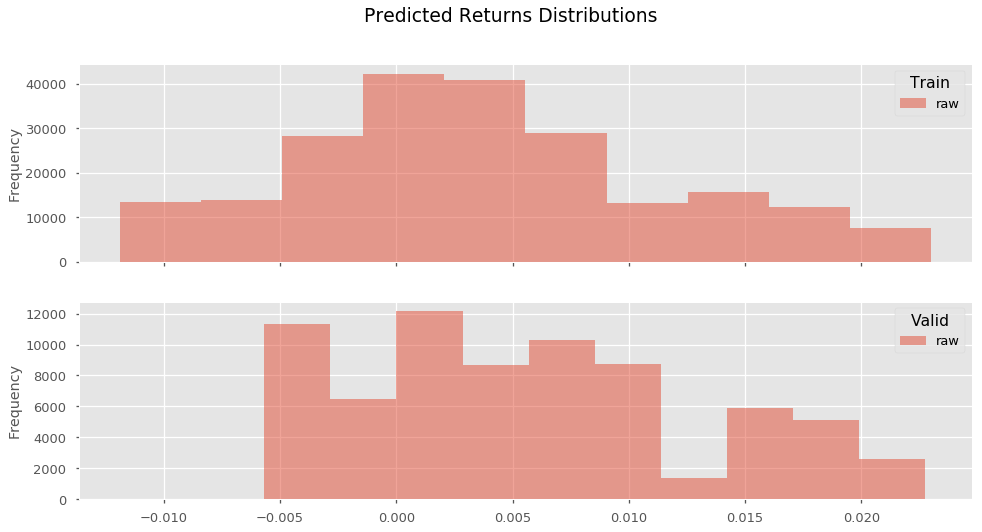

In [42]:
fig, axs = plt.subplots(2,1, sharex=True)
plt.suptitle('Predicted Returns Distributions')

ax=axs[0]
p_train['rfraw_pred'].plot.hist(alpha=0.5, label='raw', ax=ax)
#p_train['rfnov_p_prob'].plot.hist(alpha=0.5, label='nov', ax=ax)
#p_train['logregraw_p_prob'].plot.hist(alpha=0.5, label='logreg', ax=ax)
ax.legend(title='Train')

ax=axs[1]
p_valid['rfraw_pred'].plot.hist(alpha=0.5, label='raw', ax=ax)
#p_valid['rfnov_p_prob'].plot.hist(alpha=0.5, label='nov', ax=ax)
#p_valid['logregraw_p_prob'].plot.hist(alpha=0.5, label='logreg', ax=ax)
ax.legend(title='Valid')

plt.show()

In [43]:
ml_alpha_train = rf_raw_train['ml_alpha']
ml_alpha_train_rank = ml_alpha_train.groupby(level=0).apply(lambda grp: pd.qcut(grp, q=99, labels=False, duplicates='drop'))
mu = ml_alpha_train_rank.groupby(level=0).mean()
std = ml_alpha_train_rank.groupby(level=0).std()
ml_alpha__train_rank_zscore = ml_alpha_train_rank.subtract(mu,level=0).div(std,level=0)

In [44]:
ml_alpha_valid = rf_raw_train['ml_alpha']
ml_alpha_valid_rank = ml_alpha_valid.groupby(level=0).apply(lambda grp: pd.qcut(grp, q=99, labels=False, duplicates='drop'))
mu = ml_alpha_valid_rank.groupby(level=0).mean()
std = ml_alpha_valid_rank.groupby(level=0).std()
ml_alpha_valid_rank_zscore = ml_alpha_train_rank.subtract(mu,level=0).div(std,level=0)

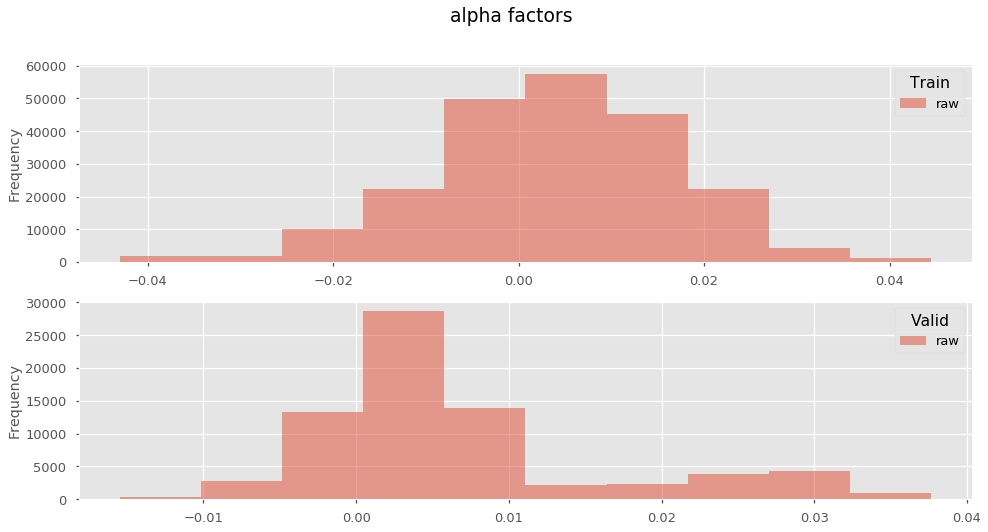

In [45]:
fig, axs = plt.subplots(2,1)
plt.suptitle('alpha factors')
ax=axs[0]
rf_raw_train['ml_alpha'].plot.hist(alpha=0.5, label='raw', ax=ax)
#rf_nov_train['ml_alpha'].plot.hist(alpha=0.5, label='nov', ax=ax)
#logreg_raw_train['ml_alpha'].plot.hist(alpha=0.5, label='logreg', ax=ax)
ax.legend(title='Train')

ax=axs[1]
rf_raw_valid['ml_alpha'].plot.hist(alpha=0.5, label='raw', ax=ax)
#rf_nov_valid['ml_alpha'].plot.hist(alpha=0.5, label='nov', ax=ax)
#logreg_raw_valid['ml_alpha'].plot.hist(alpha=0.5, label='logreg', ax=ax)
ax.legend(title='Valid')

plt.show()

In [46]:
rf_raw_valid['factor_returns'].corr()

,Momentum_1YR_Smoothed,Overnight_Sentiment_Smoothed,Mean_Reversion_Sector_Neutral_Smoothed,ML_FACTOR
Momentum_1YR_Smoothed,1.000000,0.213642,-0.206553,-0.485016
Overnight_Sentiment_Smoothed,0.213642,1.000000,-0.648784,-0.132793
Mean_Reversion_Sector_Neutral_Smoothed,-0.206553,-0.648784,1.000000,0.353894
ML_FACTOR,-0.485016,-0.132793,0.353894,1.000000


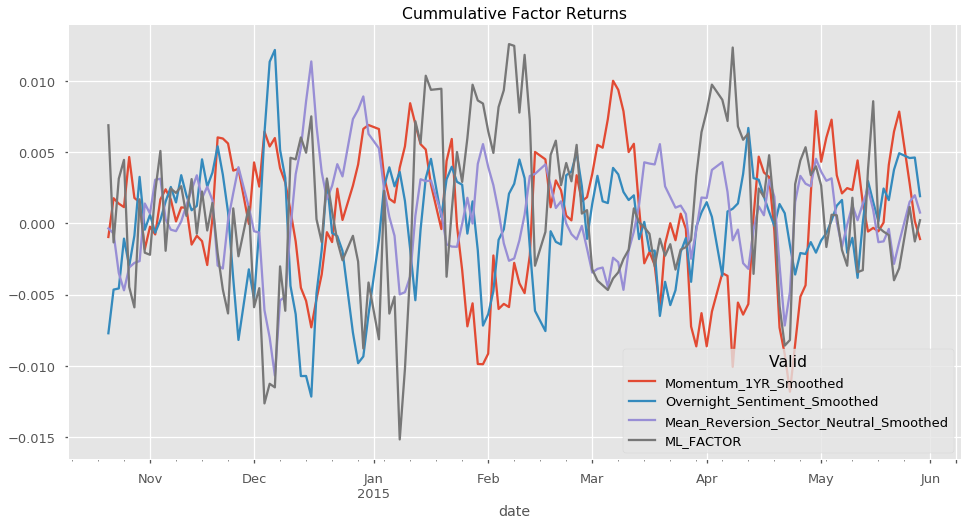

In [47]:
ax = rf_raw_valid['factor_returns'].plot(label='raw')
#rf_nov_valid['factor_cum_returns'].plot(y='ML_FACTOR', label='nov', ax=ax)
#logreg_raw_valid['factor_cum_returns'].plot(y='ML_FACTOR', label='logreg', ax=ax)
plt.title('Cummulative Factor Returns')
plt.legend(title='Valid')
plt.show()

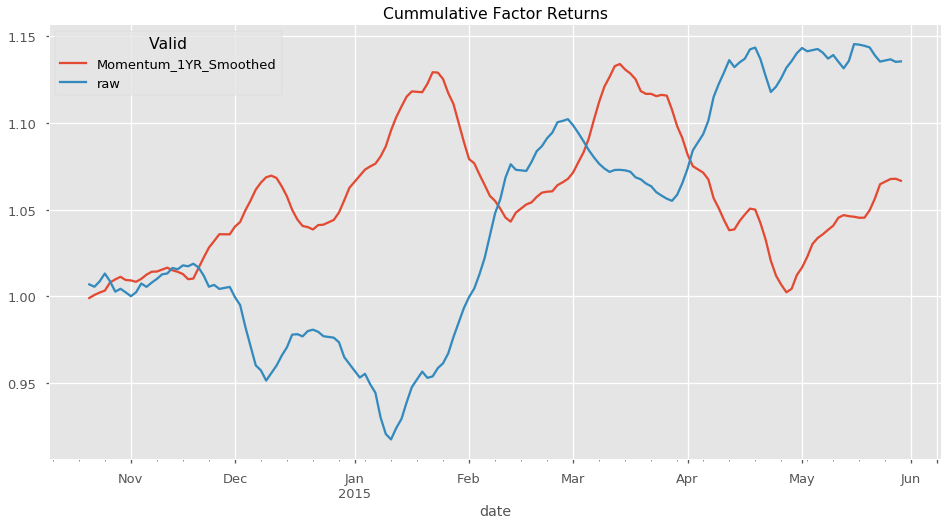

In [48]:
ax = rf_raw_valid['factor_cum_returns'].plot(y='Momentum_1YR_Smoothed')
rf_raw_valid['factor_cum_returns'].plot(ax = ax, y='ML_FACTOR', label='raw')
#rf_nov_valid['factor_cum_returns'].plot(y='ML_FACTOR', label='nov', ax=ax)
#logreg_raw_valid['factor_cum_returns'].plot(y='ML_FACTOR', label='logreg', ax=ax)
plt.title('Cummulative Factor Returns')
plt.legend(title='Valid')
plt.show()

In [49]:
rf_raw_train['sharpe_ratio']

Momentum_1YR_Smoothed                      0.447218
Overnight_Sentiment_Smoothed               2.715720
Mean_Reversion_Sector_Neutral_Smoothed     2.787421
ML_FACTOR                                 24.465762
dtype: float64

In [50]:
rf_raw_valid['sharpe_ratio']

Momentum_1YR_Smoothed                     1.479704
Overnight_Sentiment_Smoothed             -0.535892
Mean_Reversion_Sector_Neutral_Smoothed    2.903216
ML_FACTOR                                 2.551885
dtype: float64

In [51]:
rf_nov_valid['sharpe_ratio']

NameError: name 'rf_nov_valid' is not defined

In [ ]:
logreg_raw_valid['sharpe_ratio']

# Write Data

In [ ]:
all_factors[split_col] = 'train'
all_factors.loc[X_valid.index, split_col] = 'valid'
all_factors.loc[X_test.index, split_col] = 'test'
all_factors[split_col].value_counts(normalize=True)

In [ ]:
all_factors_cast = quant_helper.cast_zipline_multidx_to_symbol(all_factors[features + [split_col]])
all_factors_cast.to_csv(OUTPATH + OUTFILE1)

In [ ]:
targets_df_cast = quant_helper.cast_zipline_multidx_to_symbol(targets_df[['return_5d_raw', target_col]])
targets_df_cast.to_csv(OUTPATH + OUTFILE2)

In [ ]:
import pickle
nov_final = fin_nov_models[0]
with open(OUTPATH + OUTFILE3, 'wb') as file:
    pickle.dump(nov_final, file)